In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# columns: Measurement date,Dose strength,Rain

lodz_df = pd.read_csv("data/lodz.csv")
gdynia_df = pd.read_csv("data/gdynia.csv")
krakow_df = pd.read_csv("data/krakow.csv")
warszawa_df = pd.read_csv("data/warszawa.csv")
lublin_df = pd.read_csv("data/lublin.csv")

In [9]:
def filter_by_12h_windows(df):
    df['Measurement date'] = pd.to_datetime(df['Measurement date'])
    
    df['12h_window'] = df['Measurement date'].dt.floor('12h')
    
    filtered_df = df[df['Rain'] > 3]
    
    return filtered_df

In [3]:
# Convert the 'Measurement date' column to datetime
lodz_df['Measurement date'] = pd.to_datetime(lodz_df['Measurement date'])

# # Filter the data where 'Rain' is greater than 3
# filtered_df = lodz_df[lodz_df['Rain'] > 3]

# # Resample data into 12-hour windows, using the mean for 'Dose strength' and 'Rain'
# filtered_df.set_index('Measurement date', inplace=True)
# resampled_df = filtered_df.resample('12h').mean()

# # Find the peaks within each 12-hour window
# peaks = filtered_df.resample('12h').max()

# # Drop rows with NaN values which resulted from resampling (if any)
# resampled_df.dropna(inplace=True)
# peaks.dropna(inplace=True)

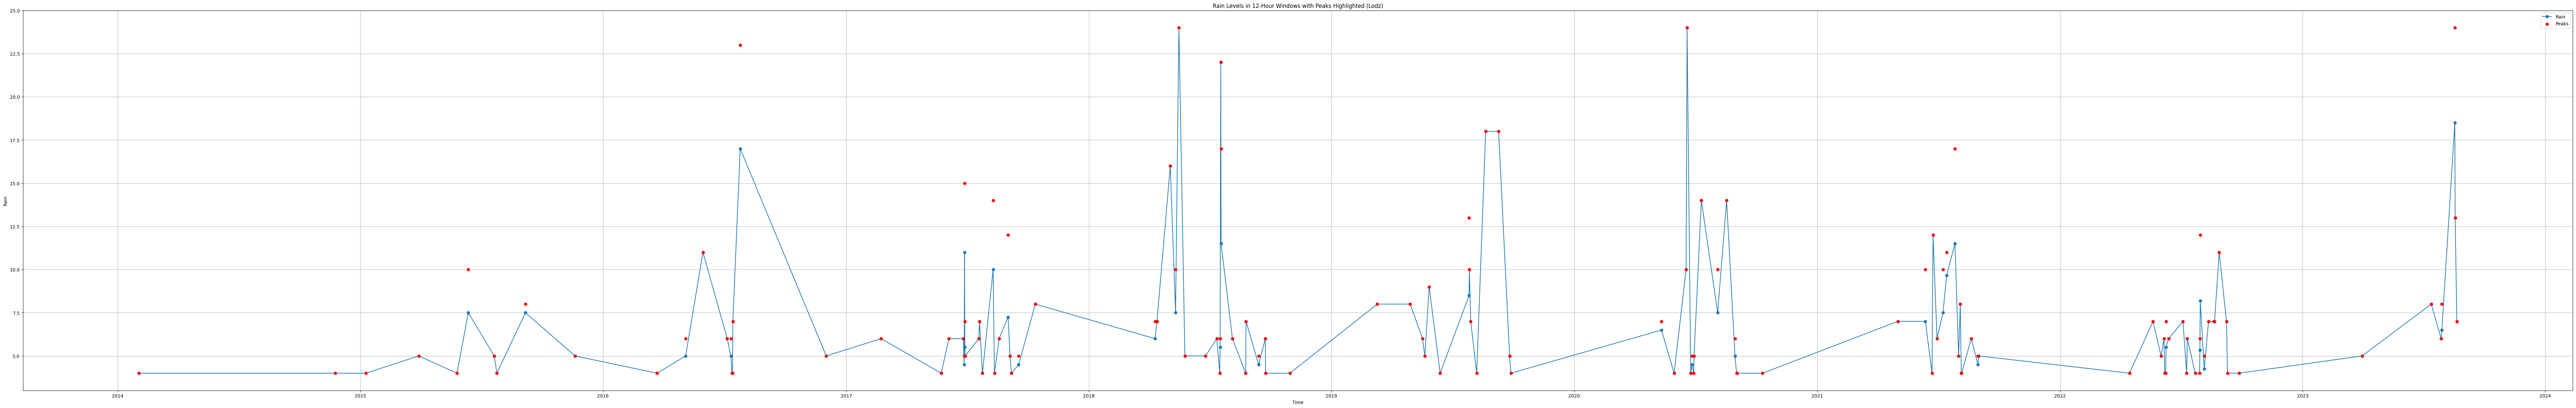

In [18]:
# # Plotting
# plt.figure(figsize=(100, 15))
# plt.plot(resampled_df.index, resampled_df['Rain'], marker='o', linestyle='-', label='Rain')
# plt.scatter(peaks.index, peaks['Rain'], color='red', zorder=5, label='Peaks')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# plt.title('Rain Levels in 12-Hour Windows with Peaks Highlighted (Lodz)')
# plt.grid(True)
# plt.legend()
# plt.show()

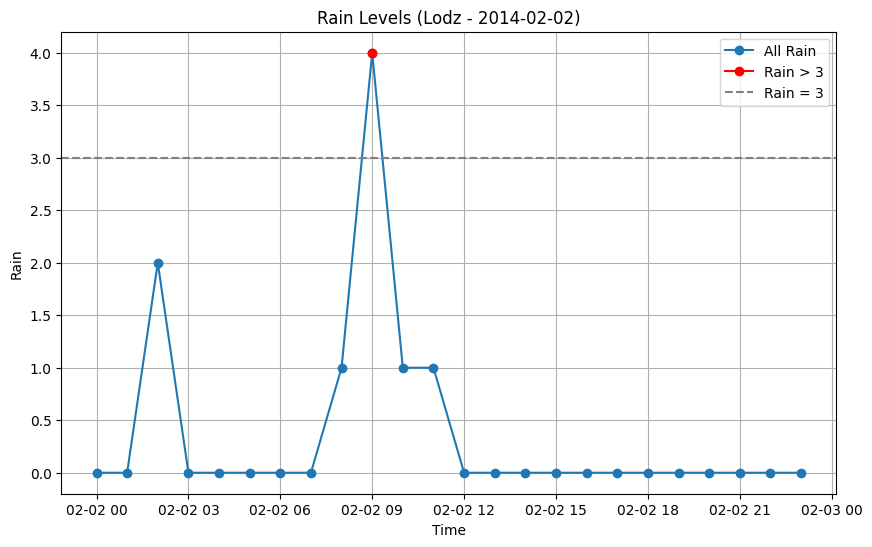

In [6]:
# specific_day = '2014-02-02'
# lodz_day_df = lodz_df[lodz_df['Measurement date'].dt.date == pd.to_datetime(specific_day).date()]
# # Filter the data where 'Rain' is greater than 3
# filtered_df = lodz_day_df[lodz_day_df['Rain'] > 2]

# # Plotting
# plt.figure(figsize=(10, 6))

# # Plot all Rain values
# plt.plot(lodz_day_df['Measurement date'], lodz_day_df['Rain'], marker='o', linestyle='-', label='All Rain')

# # Highlight Rain values greater than 3
# plt.plot(filtered_df['Measurement date'], filtered_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3')

# # Add horizontal line at Rain = 3
# plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# plt.title(f'Rain Levels (Lodz - {specific_day})')
# plt.grid(True)
# plt.legend()
# plt.show()

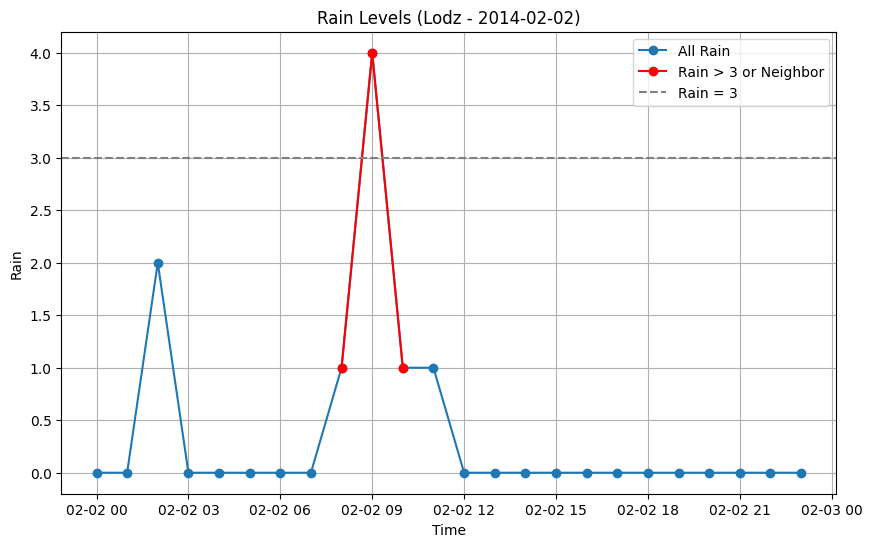

In [18]:
specific_day = '2014-02-02'
lodz_day_df = lodz_df[lodz_df['Measurement date'].dt.date == pd.to_datetime(specific_day).date()].copy()

# Create a new column 'Rain_Above_3' with initial False values
lodz_day_df['Rain_Above_3'] = lodz_day_df['Rain'] > 3

# Extend the True values to neighboring rows
lodz_day_df['Rain_Above_3'] = lodz_day_df['Rain_Above_3'] | lodz_day_df['Rain_Above_3'].shift(1, fill_value=False) | lodz_day_df['Rain_Above_3'].shift(-1, fill_value=False)

# Plotting
plt.figure(figsize=(10, 6))

# Plot all Rain values
plt.plot(lodz_day_df['Measurement date'], lodz_day_df['Rain'], marker='o', linestyle='-', label='All Rain')

# Highlight Rain values greater than 3 and their neighbors
highlighted_df = lodz_day_df[lodz_day_df['Rain_Above_3']]
plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

# Add horizontal line at Rain = 3
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title(f'Rain Levels (Lodz - {specific_day})')
plt.grid(True)
plt.legend()
plt.show()


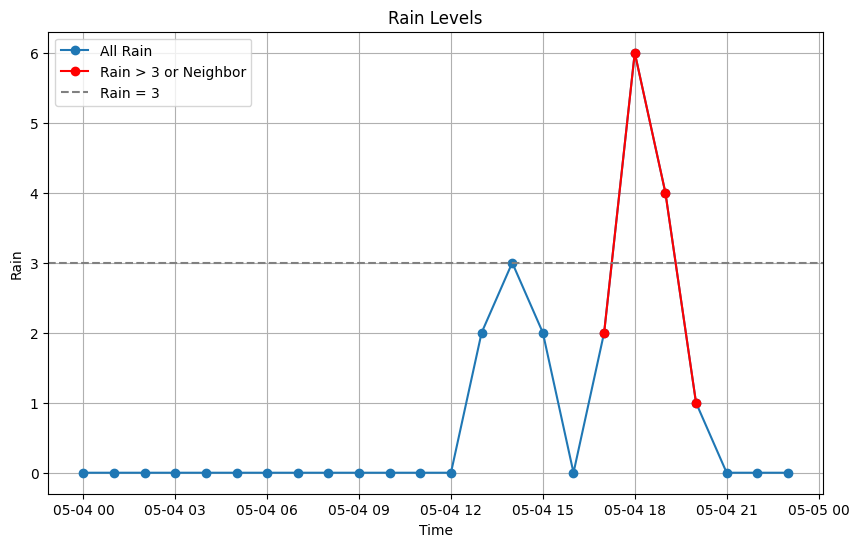

In [4]:
slide_df = pd.read_csv("data/slide.csv")

# Konwersja kolumny 'Measurement date' na typ datetime
slide_df['Measurement date'] = pd.to_datetime(slide_df['Measurement date'])

# Tworzenie kolumny 'Rain_Above_3' z wartościami True/False
slide_df['Rain_Above_3'] = slide_df['Rain'] > 3

# Rozszerzanie True na sąsiednie wiersze
slide_df['Rain_Above_3'] = slide_df['Rain_Above_3'] | slide_df['Rain_Above_3'].shift(1, fill_value=False) | slide_df['Rain_Above_3'].shift(-1, fill_value=False)

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Wykres wszystkich wartości Rain
plt.plot(slide_df['Measurement date'], slide_df['Rain'], marker='o', linestyle='-', label='All Rain')

# Wykres wartości Rain większych niż 3 oraz ich sąsiadów
highlighted_df = slide_df[slide_df['Rain_Above_3']]
plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

# Dodanie poziomej linii dla Rain = 3
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels')
plt.grid(True)
plt.legend()
plt.show()
# Konwersja kolumny 'Measurement date' na typ datetime
# slide_df['Measurement date'] = pd.to_datetime(slide_df['Measurement date'])

# # Grupowanie danych co 12 godzin i znajdowanie maksymalnej wartości deszczu w oknie czasowym
# slide_df['Rain_Max_in_12H'] = slide_df.groupby(slide_df['Measurement date'].dt.hour // 12)['Rain'].transform('max')

# # Tworzenie kolumny 'Rain_Above_3' z wartościami True/False
# slide_df['Rain_Above_3'] = slide_df['Rain'] == slide_df['Rain_Max_in_12H']

# # Tworzenie wykresu
# plt.figure(figsize=(10, 6))

# # Wykres wszystkich wartości Rain
# plt.plot(slide_df['Measurement date'], slide_df['Rain'], marker='o', linestyle='-', label='All Rain')

# # Wykres wartości Rain większych niż 3 oraz ich sąsiadów
# highlighted_df = slide_df[slide_df['Rain_Above_3']]
# plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Peak Rain')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# plt.title('Rain Levels')
# plt.grid(True)
# plt.legend()
# plt.show()


In [12]:
def process_data(file_path):
    # Wczytywanie danych z pliku CSV
    slide_df = pd.read_csv(file_path)

    # Konwersja kolumny 'Measurement date' na typ datetime
    slide_df['Measurement date'] = pd.to_datetime(slide_df['Measurement date'])

    # Grupowanie danych co 12 godzin i znajdowanie maksymalnej wartości deszczu w oknie czasowym
    slide_df['Rain_Max_in_12H'] = slide_df.groupby(slide_df['Measurement date'].dt.hour // 12)['Rain'].transform('max')

    # Tworzenie kolumny 'Rain_Above_3' z wartościami True/False
    slide_df['Rain_Above_3'] = slide_df['Rain'] == slide_df['Rain_Max_in_12H']

    return slide_df

def plot_data(df):
    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))

    # Wykres wszystkich wartości Rain
    plt.plot(df['Measurement date'], df['Rain'], marker='o', linestyle='-', label='All Rain')

    # Wykres wartości Rain większych niż 3 oraz ich sąsiadów
    highlighted_df = df[df['Rain_Above_3']]
    plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Peak Rain')

    plt.xlabel('Time')
    plt.ylabel('Rain')
    plt.title('Rain Levels')
    plt.grid(True)
    plt.legend()
    plt.show()

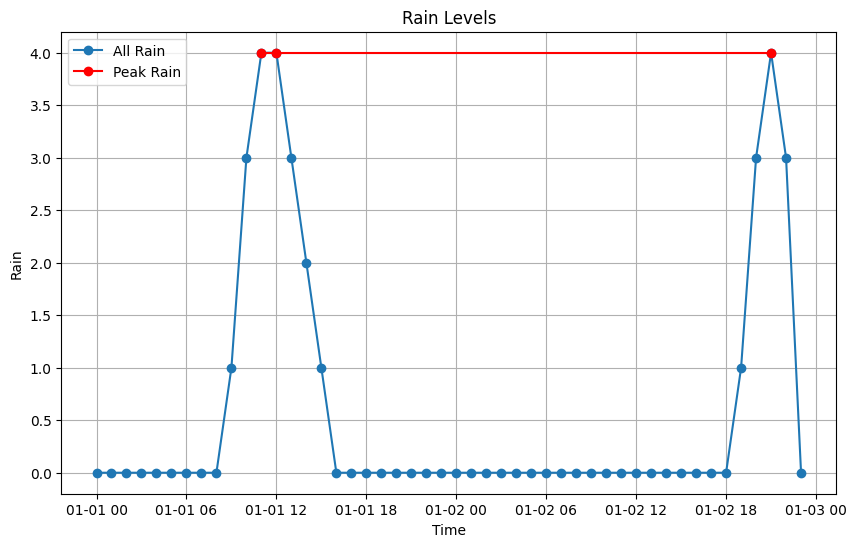

In [16]:
# Wywołanie funkcji
file_path = "data/slide.csv"
slide_df = process_data(file_path)
plot_data(slide_df)

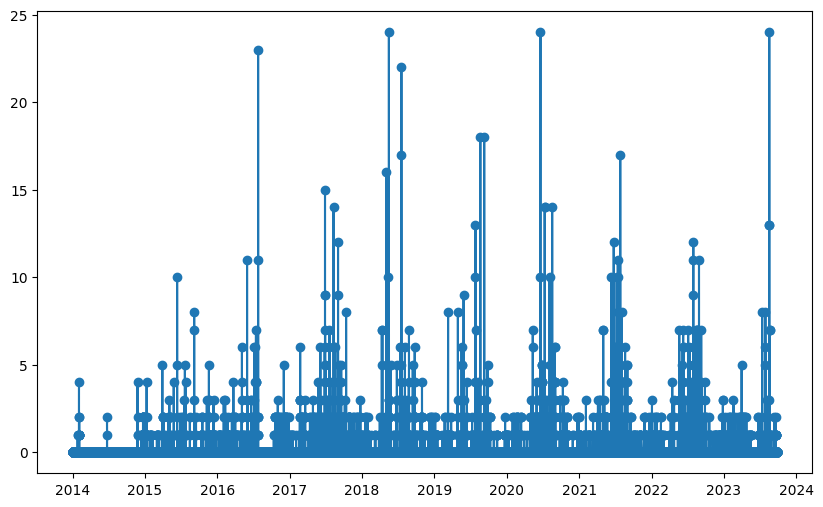

In [19]:
def process_and_update(df):
    # Konwersja kolumny 'Measurement date' na typ datetime
    df['Measurement date'] = pd.to_datetime(df['Measurement date'])

    # Grupowanie danych co 24 godziny i znajdowanie maksymalnej wartości deszczu w oknie czasowym
    df['Rain_Max_in_24H'] = df.groupby(df['Measurement date'].dt.date)['Rain'].transform('max')

    # Tworzenie kolumny 'Rain_Above_3' z wartościami True/False
    df['Rain_Above_3'] = df['Rain'] == df['Rain_Max_in_24H']

    return df

# Wczytywanie danych z pliku CSV dla Łodzi
lodz_df = pd.read_csv("data/lodz.csv")

# Przetwarzanie danych i uzupełnianie kolumny 'Rain_Above_3'
lodz_df = process_and_update(lodz_df)

# Możesz teraz wykonać inne operacje na DataFrame lub go zapisać do pliku, bez rysowania wykresu tutaj

# Opcjonalnie, możesz również wykonać rysowanie wykresu, jeśli to jest potrzebne
plt.figure(figsize=(10, 6))

# Wykres wszystkich wartości Rain
plt.plot(lodz_df['Measurement date'], lodz_df['Rain'], marker='o', linestyle='-', label='All Rain')

# Wykres wartości Rain większych niż 3 oraz ich sąsiadów
highlighted_df = lodz_df[lodz_df['Rain_Above_3']]
# plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

# # Dodanie poziomej linii dla Rain = 3
# plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# plt.title('Rain Levels')
# plt.grid(True)
# plt.legend()
# plt.show()
